In [1]:
#import files cell
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time 
from datetime import date

In [2]:
#reading the files
amz_ord = pd.read_csv('amazon-orders.csv')
amz_ord.head()

#need size of the full file for editing
#amz_ord.shape #(59 rows by 23 columns)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name &amp; Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,4/1/2019,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,4/1/2019,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,4/1/2019,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,4/4/2019,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,4/5/2019,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,4/5/2019,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,4/7/2019,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


In [3]:
#filling out the nan values
amz_ord = amz_ord.fillna(0)

In [4]:
#remove the dollar signs from the subtotal, shipping charge, 
#tax before promotions, tax charged, total charged, columns


amz_ord["Total Charged"] = amz_ord["Total Charged"].str.replace('$','').astype(float)

amz_ord["Tax Charged"] = amz_ord["Tax Charged"].str.replace('$','').astype(float)

amz_ord["Total Promotions"] = amz_ord["Total Promotions"].str.replace('$','').astype(float)

amz_ord["Tax Before Promotions"] = amz_ord["Tax Before Promotions"].str.replace('$','').astype(float)

amz_ord["Shipping Charge"] = amz_ord["Shipping Charge"].str.replace('$','').astype(float)

amz_ord["Subtotal"] = amz_ord["Subtotal"].str.replace('$','').astype(float)

In [5]:
#doubling checking that the values are filled
amz_ord.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name &amp; Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,4/1/2019,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),35.00,0.0,1.93,0.0,1.93,36.93,Your Name,0.0
1,4/1/2019,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),16.99,0.0,0.00,0.0,0.00,16.99,Your Name,0.0
2,4/1/2019,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),9.99,0.0,0.00,0.0,0.00,9.99,Your Name,0.0
3,4/4/2019,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/5/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),147.98,0.0,8.14,0.0,8.14,156.12,Your Name,0.0
4,4/5/2019,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/7/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),14.99,0.0,0.00,0.0,0.00,14.99,Your Name,0.0


In [6]:
#see how much we have spent
tl_chrg = amz_ord["Total Charged"]
print(tl_chrg.sum())
print('1777 is a lot ...')

#see what is the avg purchase price
print(tl_chrg.mean())

#what is the median?
print(tl_chrg.median())

#highest purchasing price
print(tl_chrg.max())

#lowest purchasing price
print(tl_chrg.min())

1777.7300000000002
1777 is a lot ...
30.131016949152546
15.95
210.99
1.04


In [7]:
#seeing now how much taxes make an impact
tx_chrg = amz_ord["Tax Charged"]
tx_sum = tx_chrg.sum()
print(tx_sum)

#overall tax rate
print(tx_sum/tl_chrg.sum())



52.60999999999999
0.02959392033660904


In [8]:
#clean up order date to be read as a date
amz_ord['Order Date'] = pd.to_datetime(amz_ord['Order Date'])

amz_ord.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name &amp; Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),35.00,0.0,1.93,0.0,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),16.99,0.0,0.00,0.0,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/1/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),9.99,0.0,0.00,0.0,0.00,9.99,Your Name,0.0
3,2019-04-04,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/5/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),147.98,0.0,8.14,0.0,8.14,156.12,Your Name,0.0
4,2019-04-05,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,4/7/2019,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),14.99,0.0,0.00,0.0,0.00,14.99,Your Name,0.0


<Axes: xlabel='Order Date'>

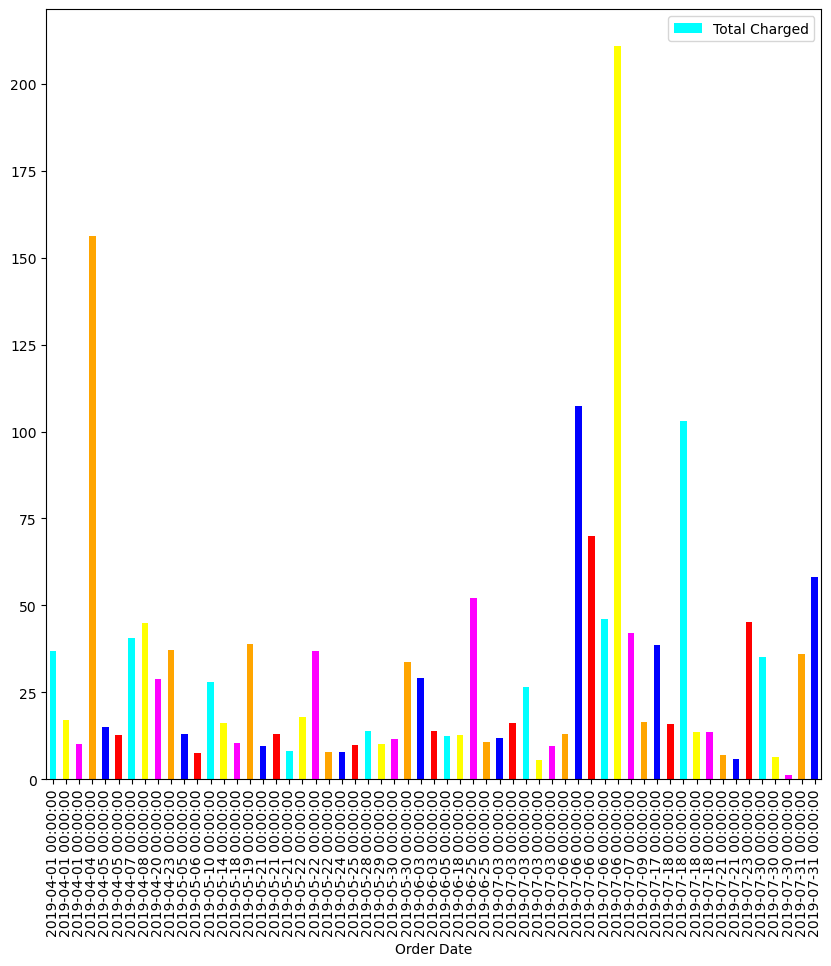

In [9]:
#see how much was spent on each day 
color = ['cyan','yellow','magenta', 'orange', 'blue', 'red']
amz_ord.plot.bar(x='Order Date',y='Total Charged', rot=90, figsize = (10,10), color = color )



In [10]:
#organize the orders by the same date
daily_orders = amz_ord.groupby('Order Date').sum()['Total Charged']
daily_orders.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

<Axes: xlabel='Order Date'>

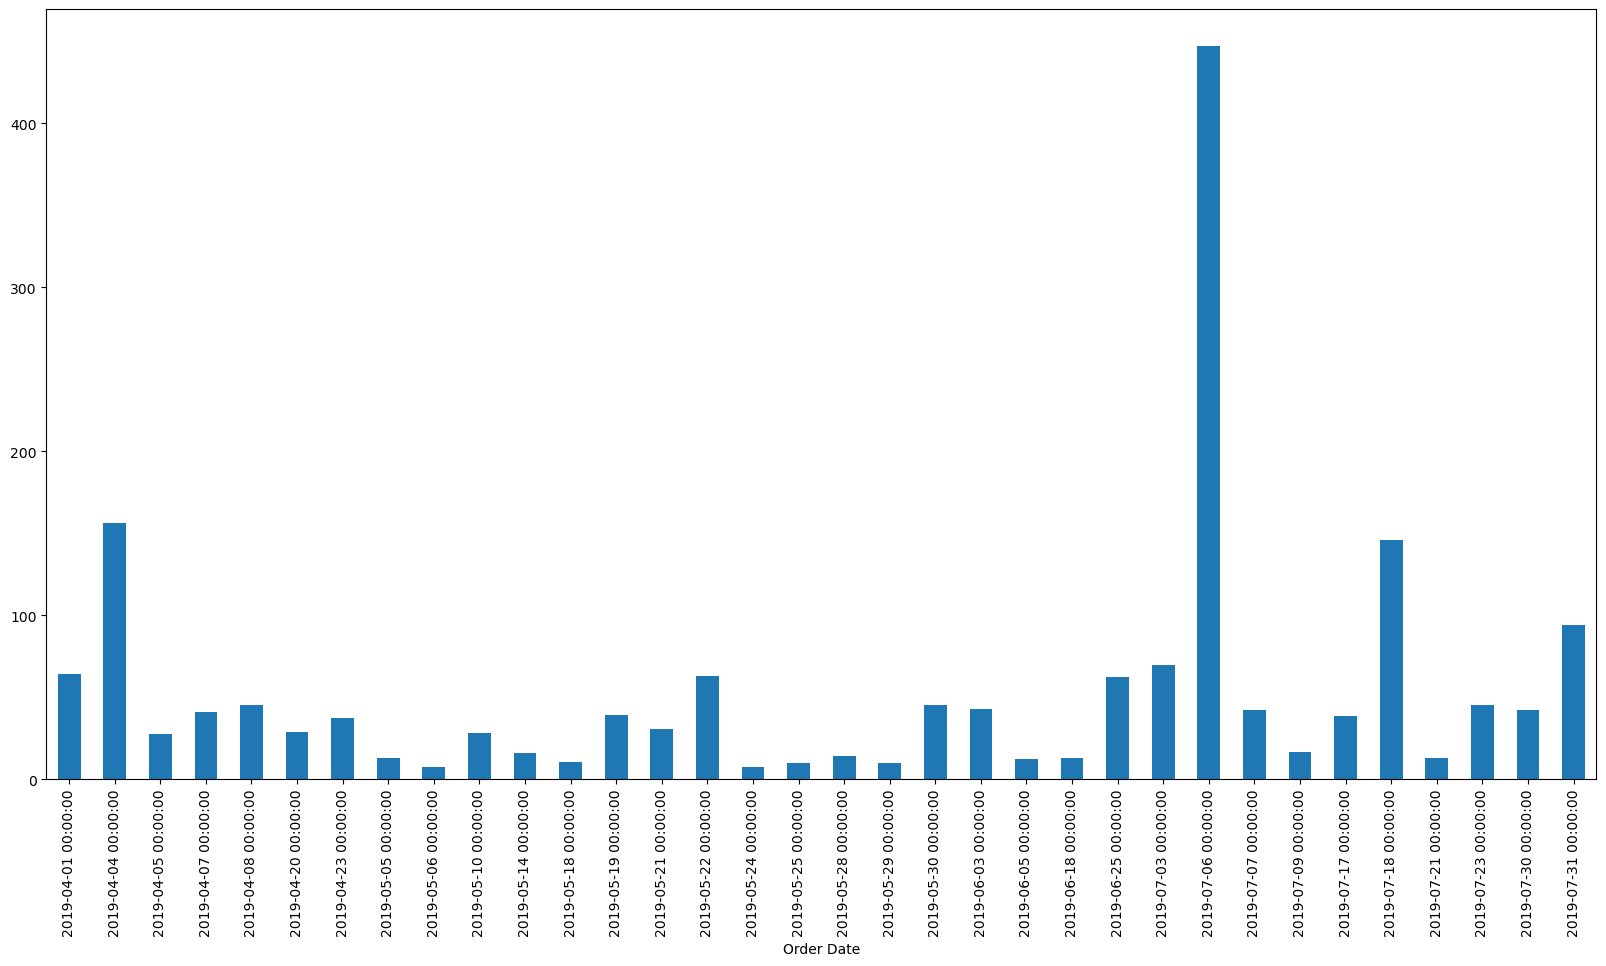

In [11]:
#plotting out the daily orders

daily_orders.plot.bar(figsize=(20,10))

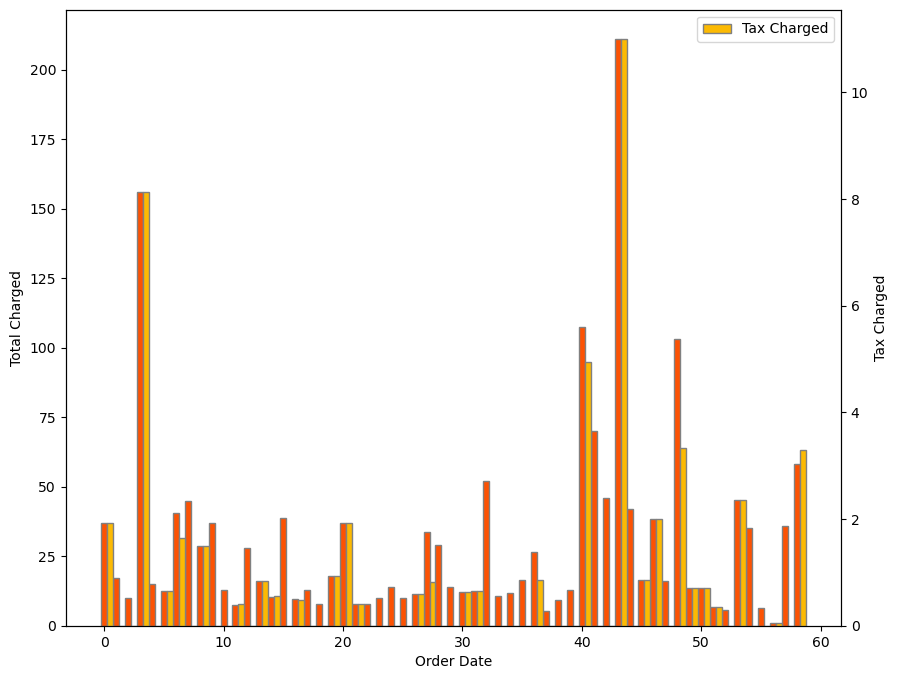

In [18]:
#add another bar to each day for tax charged
# set width of bar 
barWidth = 0.5
fig,ax = plt.subplots(figsize =(10, 8)) 

ax2 = ax.twinx()

x = np.arange(0,len(amz_ord['Order Date']),1, dtype = int)[:]
x2 = list(x+barWidth)[:]

y1 = amz_ord['Total Charged']
y2 = amz_ord['Tax Charged']

# Make the plot
bar1 = ax.bar(x, y1, width = barWidth, color = '#fc5203',edgecolor ='grey', label ='Total Charged')
bar2 = ax2.bar(x2, y2, width = barWidth, color = '#fcba03',edgecolor ='grey', label ='Tax Charged')

# Adding labels 
ax.set_ylabel("Total Charged")
ax2.set_ylabel("Tax Charged")
ax.set_xlabel("Order Number")
 

plt.legend()
plt.show() 


In [20]:
#break down the spending by month
# extract the month to make it easier to make a new list for it

a = np.zeros(shape=(0, 4))
month_4 = []
total_4 = []

month_5 = []
total_5 = []

month_6 = []
total_6 = []

c = 0

#checking the order date to add the total charged to a desiginated month
# the file I have only has 3 months but you can replace the # to c 
#if its all 12 months

for x in amz_ord['Order Date']:
    if x.month == 4:
        month_4.append(x.__str__())
        total_4.append(amz_ord['Total Charged'][c])
    elif x.month == 5:
        month_5.append(x.__str__())
        total_5.append(amz_ord['Total Charged'][c])
    elif x.month == 6:
        month_6.append(x.__str__())
        total_6.append(amz_ord['Total Charged'][c])
    c += 1

    
#making sure all the values were added
print(month_4)
print(total_4)

#for i in range(len(month_4)):
    #    a = np.append(a,[[month_4[i], total_4[i]]])

#print(a)



['2019-04-01 00:00:00', '2019-04-01 00:00:00', '2019-04-01 00:00:00', '2019-04-04 00:00:00', '2019-04-05 00:00:00', '2019-04-05 00:00:00', '2019-04-07 00:00:00', '2019-04-08 00:00:00', '2019-04-20 00:00:00', '2019-04-23 00:00:00']
[36.93, 16.99, 9.99, 156.12, 14.99, 12.65, 40.63, 44.99, 28.8, 37.08]
['2019-04-01 00:00:00' '36.93' '2019-04-01 00:00:00' '16.99'
 '2019-04-01 00:00:00' '9.99' '2019-04-04 00:00:00' '156.12'
 '2019-04-05 00:00:00' '14.99' '2019-04-05 00:00:00' '12.65'
 '2019-04-07 00:00:00' '40.63' '2019-04-08 00:00:00' '44.99'
 '2019-04-20 00:00:00' '28.8' '2019-04-23 00:00:00' '37.08']


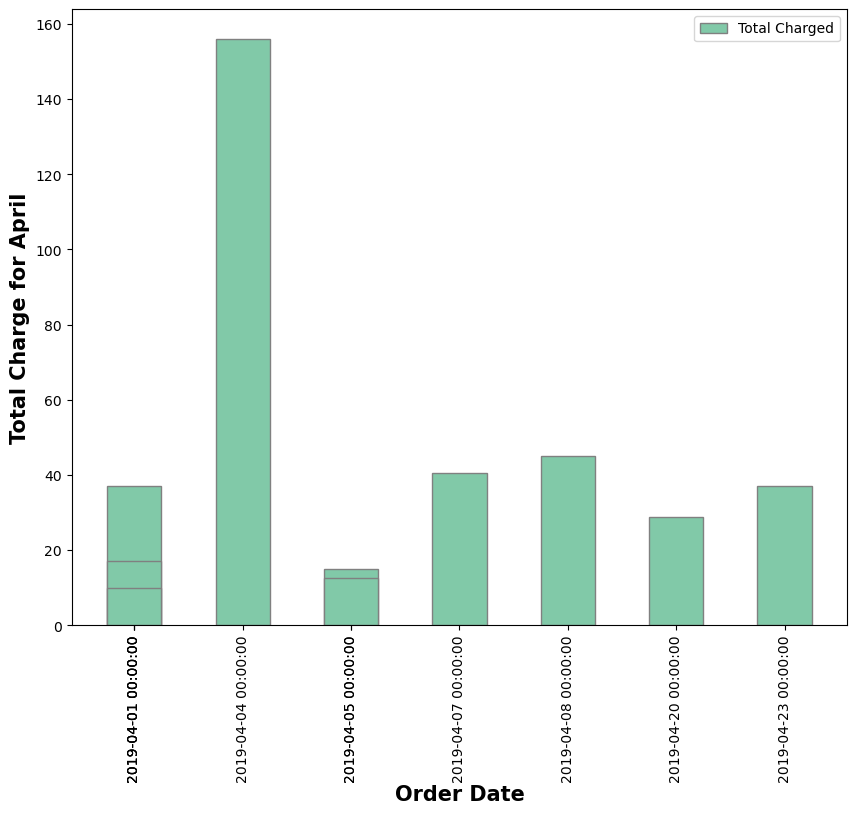

In [26]:
#them bar graphs for each of the month
# set width of bar 
barWidth = 0.5
fig,ax = plt.subplots(figsize =(10, 8)) 
 
# Make the plot I used the april month, but you can use what you feel like
plt.bar(month_4, total_4, color ='#81c9a8', width = barWidth, edgecolor ='grey', label ='Total Charged') 
 
# The labels
plt.xlabel('Order Date', fontweight ='bold', fontsize = 15, labelpad = 1) 
plt.xticks(month_4, rotation = 90)
plt.ylabel('Total Charge for April', fontweight ='bold', fontsize = 15) 

plt.legend()
plt.show() 